#### Step 1: Data Collection

In [2]:
import pandas as pd

data = pd.read_csv("income_evaluation.csv")

#### Step 2: Exploration

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


###### What about the data shape and datatypes?

In [4]:
print("""
No of columns: {}
No of rows: {}
No of categorical columns: {}
No of numerical columns: {}""".format(data.shape[1], 
                                      data.shape[0],
                                      len(data.select_dtypes('O').columns),
                                      len(data.select_dtypes(['int64', 'float']).columns)))


No of columns: 15
No of rows: 32561
No of categorical columns: 9
No of numerical columns: 6


In [5]:
data.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [6]:
data.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

###### Let's have a descriptive statistical tables of the numeric columns.

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [8]:
categorical_cols = [' workclass',  ' education',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
        ' native-country']
numerical_col = data.select_dtypes(['int64']).columns



<Figure size 432x288 with 0 Axes>

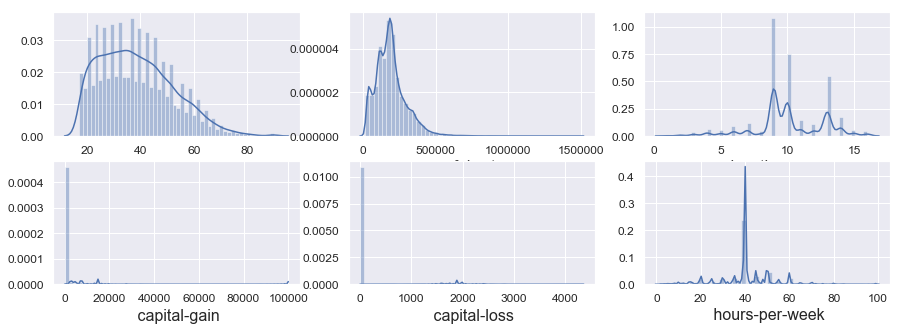

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def plot_distribution(data, features):
    i = 0
    plt.figure()
    col = 3
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(15,5))

    for feature in features:
        i += 1
        plt.subplot(row,col,i);
        sns.distplot(tuple(data[feature]))
        plt.xlabel(feature, fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=12)
        plt.tick_params(axis='y', which='major', labelsize=12)
    plt.show();
    
plot_distribution(data, numerical_col)

<Figure size 432x288 with 0 Axes>

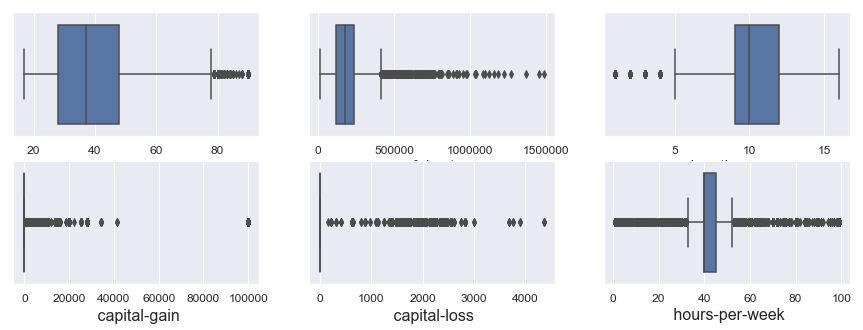

In [11]:
def plot_boxplot(data, features):
    i = 0
    plt.figure()
    col = 3
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(15,5))

    for feature in features:
        i += 1
        plt.subplot(row,col,i);
        sns.boxplot(tuple(data[feature]))
        plt.xlabel(feature, fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=12)
        plt.tick_params(axis='y', which='major', labelsize=12)
    plt.show();
    
plot_boxplot(data, numerical_col)

##### Is there any correlation between the numeric columns?

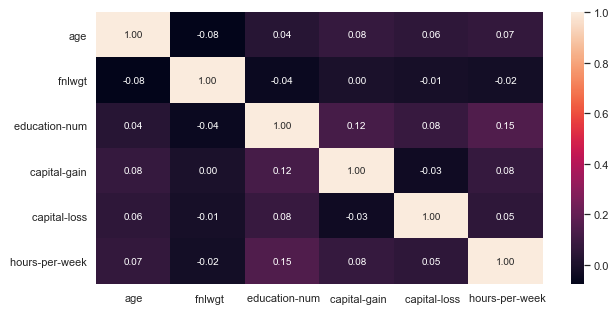

In [12]:
corr = data[numerical_col].corr()
fig, ax = plt.subplots(figsize=(10,5))  
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt=".2f");

### Step 3: Data Preprocessing

Are there any missing values?

In [13]:
pd.DataFrame(data.isnull().sum(), columns=['Missing Values'])

,Missing Values
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


We are very lucky!! Still we've got no missing values!

What percentage belongs to what ratings? Let's understand the rating distribution in our data. It is very important to check wheather your classification dataset is balanced or not.

In [14]:
val_counts = data[' hours-per-week'].value_counts()
sizes = val_counts.values
labels = val_counts.index

class_dist = pd.DataFrame({"rating":labels,
                           "count":sizes,
                           "percentage": np.round((sizes/sum(sizes))*100, 2)})
class_dist.head()

,rating,count,percentage
0,40,15217,46.73
1,50,2819,8.66
2,45,1824,5.60
3,60,1475,4.53
4,35,1297,3.98


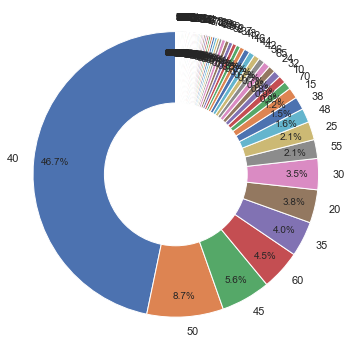

In [15]:
def plot_class_dist(sizes, labels):
    fig1, ax1 = plt.subplots(figsize=(5,5))
    ax1.pie(sizes, 
            labels=labels, 
            autopct='%1.1f%%', 
            startangle=90,
            pctdistance=0.85)

    centre_circle = plt.Circle((0,0),0.50, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    ax1.axis('equal')  
    plt.tight_layout()
    plt.show();
    
plot_class_dist(sizes, labels);

So, the data is not well distributed. It is called the imbalanced class problem.To get a better accuracy from the model, we might need to balance the dataset using sampling techniques(oversampling/undersampling).

Now, it's time for data segregation. We need to separate the feature columns and target column.

In [22]:
data=pd.get_dummies(data, columns=categorical_cols, prefix=categorical_cols)

In [23]:
X = data.loc[:, data.columns!=' income']
y = data.loc[:, data.columns==' income']

Now we have to make dataset for traing and validation.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    stratify=y, random_state=1234)

print("""
X_train has {} data points.
y_train has {} data points.
X_test has {} data points.
y_test has {} data points.
""".format(X_train.shape[0], y_train.shape[0], X_test.shape[0], y_test.shape[0]))


X_train has 26048 data points.
y_train has 26048 data points.
X_test has 6513 data points.
y_test has 6513 data points.



In [18]:
#X_train=pd.get_dummies(X_train, columns=categorical_cols, prefix=categorical_cols)

In [19]:
#X_test=pd.get_dummies(X_test, columns=categorical_cols, prefix=categorical_cols)

### Step 4: Modeling

We'll use Decision Tree algorithm for data modeling. This is one of the most powerful yet an easy model. The best thing about Decision Tree is you can extract the feature importance from the model and also interpret the tree for extracting the underlying patterns in data.

In [25]:
from sklearn.tree import DecisionTreeClassifier

clf_model = DecisionTreeClassifier(random_state=1234)
clf_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

### Step 5: Validation

In [27]:
y_pred = clf_model.predict(X_test)

There are wide variety of evaluation metrics for validating regression models such as Accuracy, AUC, Precision, Recall, F1 score. For our problem we'll use the accuracy metric.

Remember: Accuracy is not always the best metric to valiate classification model. Sometime, depending on the problem, you'll need to choose other metrics.

In [28]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_test, y_pred)

print("The accuracy score is {}".format(acc_score))

The accuracy score is 0.8185168125287886
